Author: Tong Xu
<br>
Deadline: Wednesday December 9, 2020

# Load Data

Analyzing data from the 2016 Kaggle Competition "Two Sigma Connect: Rental Listing Inquiries" and predicting interest level on rental listings.

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_json('../Data/train.json')
test_df = pd.read_json('../Data/test.json')

train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


**Check for null values.**

In [3]:
train_df.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64

In [4]:
test_df.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
dtype: int64

There are no null values.

**Data Summary**

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [6]:
train_df['created'] = pd.to_datetime(train_df['created'])
test_df['created'] = pd.to_datetime(test_df['created'])

X_train = train_df.drop(columns='interest_level')
y_train = train_df['interest_level'].apply(lambda interest: 0 if interest == 'low' else 1 if interest == 'medium' else 2)

Group features by data types.

In [7]:
numerical_features = list(X_train.select_dtypes('number').columns)
categorical_features = list(X_train.select_dtypes('object').columns)
date_features = list(X_train.select_dtypes('datetime').columns)

print('Numberical features:', numerical_features)
print('Categorical features:', categorical_features)
print('Datetime features:', date_features)

Numberical features: ['bathrooms', 'bedrooms', 'latitude', 'listing_id', 'longitude', 'price']
Categorical features: ['building_id', 'description', 'display_address', 'features', 'manager_id', 'photos', 'street_address']
Datetime features: ['created']


# Exploratory Data Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

**Target**

Text(0, 0.5, 'Count')

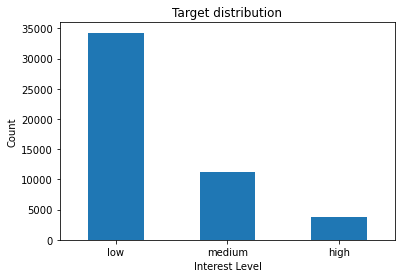

In [9]:
train_df.interest_level.value_counts().plot(kind='bar', title='Target distribution', rot='horizontal')
plt.xlabel('Interest Level')
plt.ylabel('Count')

train_test_split should be stratified to preserve target class ratios.

**Price**

/Users/tongxu/opt/anaconda3/envs/ensf-ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Rental Price Distribution')

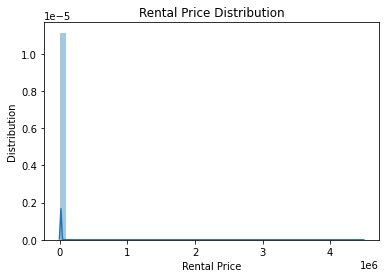

In [10]:
sns.distplot(X_train['price'])
plt.xlabel('Rental Price')
plt.ylabel('Distribution')
plt.title('Rental Price Distribution')

To better visualize the price distribution, I will set the lower and upper bound for price at 1 and 99 percentile.

In [11]:
lower_bound = np.percentile(train_df['price'], 1)
upper_bound = np.percentile(train_df['price'], 99)

print('1 percentile for rental price', lower_bound)
print('99 percentile for rental price', upper_bound)

1 percentile for rental price 1475.0
99 percentile for rental price 13000.0


/Users/tongxu/opt/anaconda3/envs/ensf-ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Rental Price Distribution')

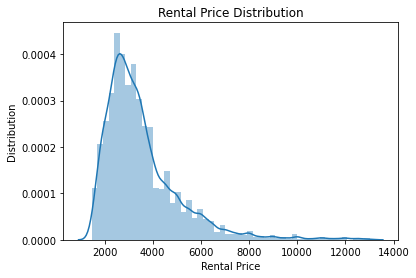

In [12]:
filtered_df = train_df[(train_df.price >= lower_bound) & (train_df.price <= upper_bound)]

sns.distplot(filtered_df['price'])
plt.xlabel('Rental Price')
plt.ylabel('Distribution')
plt.title('Rental Price Distribution')

We can also use a boxplot to show the median, quartiles and outliers

/Users/tongxu/opt/anaconda3/envs/ensf-ml/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

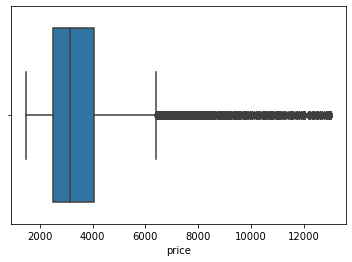

In [13]:
sns.boxplot(filtered_df['price'])

The price distribution is skewed to the right.

We can visualize price distribution as a function of interest level.

<AxesSubplot:xlabel='interest_level', ylabel='price'>

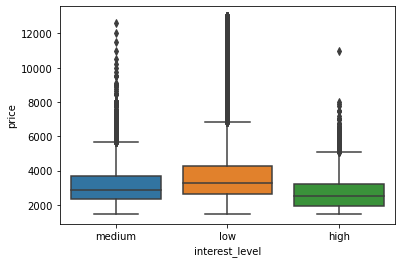

In [14]:
sns.boxplot(x='interest_level', y='price', data=filtered_df)

Expectedly, listing with high interest level have lowest median rental price.

**Bedroom and Bathroom**

(-1.0, 9.0)

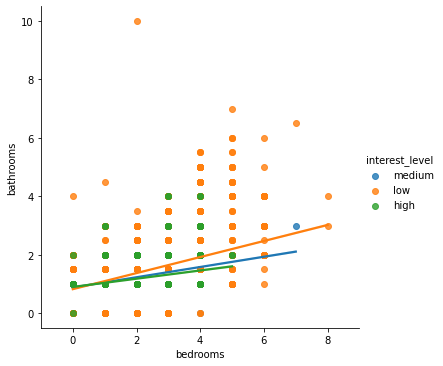

In [15]:
sns.lmplot(x='bedrooms', y='bathrooms', data=train_df, hue='interest_level')
plt.xlim(-1,9)

For a given number of bedrooms, rentals with fewer number of bathrooms have higher interest level

**Longitude and Latitude**

/Users/tongxu/opt/anaconda3/envs/ensf-ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='latitude', ylabel='Density'>

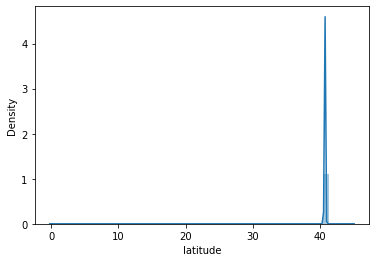

In [16]:
sns.distplot(train_df.latitude)

Again, to better visualize the longitude and latitude distribution, I will set the lower and upper bound at 1 and 99 percentile.

In [17]:
long_lower_bound = np.percentile(train_df['longitude'], 1)
long_upper_bound = np.percentile(train_df['longitude'], 99)
lat_lower_bound = np.percentile(train_df['latitude'], 1)
lat_upper_bound = np.percentile(train_df['latitude'], 99)

print('1 percentile for rental longitude', long_lower_bound)
print('99 percentile for rental longitude', long_upper_bound)
print('1 percentile for rental latitude', lat_lower_bound)
print('99 percentile for rental latitude', lat_upper_bound)

1 percentile for rental longitude -74.0162
99 percentile for rental longitude -73.852651
1 percentile for rental latitude 40.6404
99 percentile for rental latitude 40.862047


In [18]:
filtered_df = train_df[(train_df.longitude >= long_lower_bound) & (train_df.longitude <= long_upper_bound)
                      &(train_df.latitude >= lat_lower_bound) & (train_df.latitude <= lat_upper_bound)]

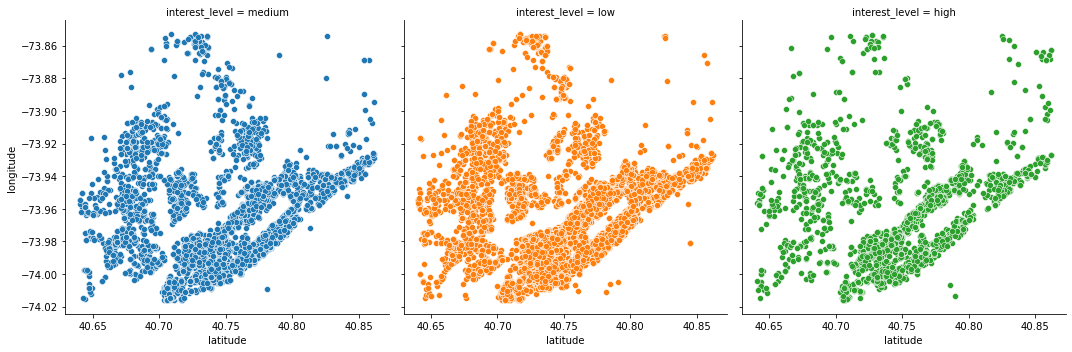

In [19]:
g = sns.FacetGrid(filtered_df, hue='interest_level', col='interest_level', height=5)
g.map(sns.scatterplot, 'latitude', 'longitude')

There does not appear to be correlation between location and interest level.

**Date-time Feature**

In [20]:
copy_df = train_df.copy()
copy_df['created_month'] = copy_df.created.dt.month
copy_df['created_date'] = copy_df.created.dt.date
copy_df['created_hour'] = copy_df.created.dt.hour
copy_df['created_weekday'] = copy_df.created.dt.weekday

*Number of listings created based on dates:*

In [21]:
copy_df.groupby('created_month')['listing_id'].agg(np.ma.count)

created_month
4    16411
5    15797
6    17144
Name: listing_id, dtype: int64

<AxesSubplot:xlabel='created_date', ylabel='listing_id'>

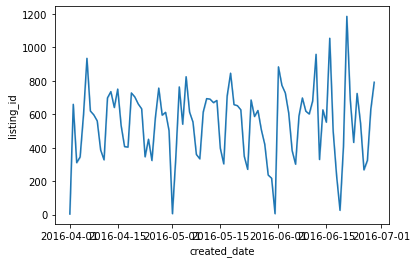

In [22]:
sns.lineplot(x='created_date', y='listing_id', data=copy_df, estimator=np.ma.count)

<AxesSubplot:xlabel='created_date', ylabel='listing_id'>

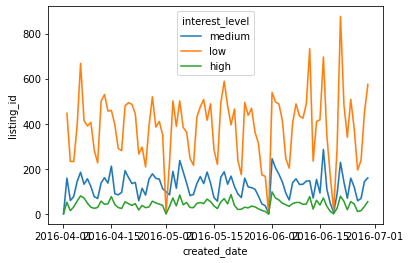

In [23]:
sns.lineplot(x='created_date', y='listing_id', data=copy_df, estimator=np.ma.count, hue='interest_level')

No change in number of listing over time.

*Median prices of listing based on dates:*

In [24]:
copy_df.groupby('created_month')['price'].agg(np.median)

created_month
4    3100
5    3195
6    3150
Name: price, dtype: int64

<AxesSubplot:xlabel='created_date', ylabel='price'>

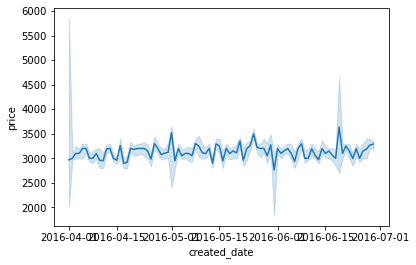

In [25]:
sns.lineplot(x='created_date', y='price', data=copy_df, estimator=np.median)

<AxesSubplot:xlabel='created_date', ylabel='price'>

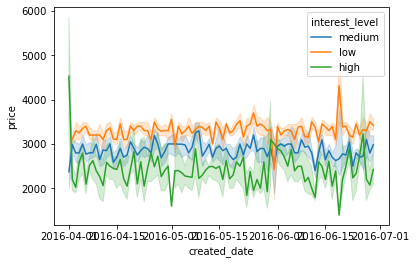

In [26]:
sns.lineplot(x='created_date', y='price', data=copy_df, estimator=np.median, hue='interest_level')

No changes in listing price over time.

*Number of listings based on the weekdays:*

<AxesSubplot:xlabel='created_weekday', ylabel='listing_id'>

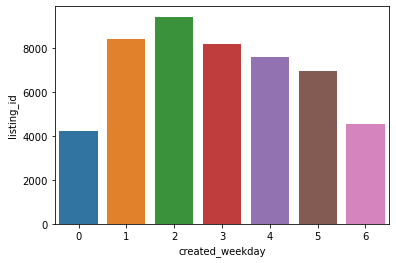

In [27]:
sns.barplot(x='created_weekday', y='listing_id', data=copy_df, estimator=np.ma.count)

More listing are posted on Tuesday and fewer listings are posted over the weekend.

*Number of listings based on hours in a day:*

<AxesSubplot:xlabel='created_hour', ylabel='listing_id'>

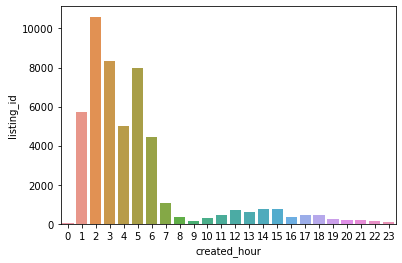

In [28]:
sns.barplot(x='created_hour', y='listing_id', data=copy_df, estimator=np.ma.count)

More listing are posted in the morning.

**Correlation between the numerical features**

<AxesSubplot:>

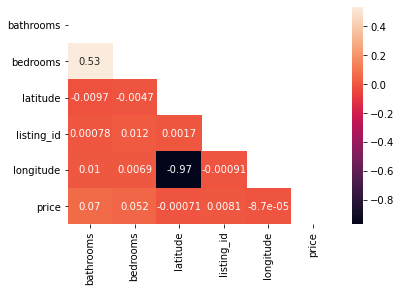

In [29]:
corr = X_train[numerical_features].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, annot=True)

# Baseline Model

Train model default parameters and the numerical features from the dataset.

In [30]:
X_train = X_train.set_index('listing_id')
test_df = test_df.set_index('listing_id')

num_features = ['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price']
cat_features = ['building_id','manager_id','display_address','street_address']
text_features = ['description', 'features']

In [31]:
import lightgbm as lgb

lgb_params = dict()
lgb_params['objective'] = 'multiclass'
lgb_params['num_class'] = 3

lgb_cv = lgb.cv(lgb_params,
                lgb.Dataset(X_train[num_features], y_train))


best_score = min(lgb_cv['multi_logloss-mean'])
print ('Best (minimum) mean log loss is {:.5f}'.format(best_score))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 786
[LightGBM] [Info] Number of data points in the train set: 39481, number of used features: 5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 786
[LightGBM] [Info] Number of data points in the train set: 39481, number of used features: 5
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 786
[LightGBM] [Info] Number of da

# Feature Engineering

Combine training and test data so that we only have to do the tranformation once.

In [32]:
train_size = X_train.shape[0]

feature_df = pd.concat([X_train, test_df])

In [33]:
feature_df.describe()

,bathrooms,bedrooms,latitude,longitude,price
count,124011.000000,124011.000000,124011.000000,124011.000000,1.240110e+05
mean,1.212622,1.543460,40.737641,-73.949434,3.781324e+03
std,0.595209,1.110203,0.744337,1.372882,1.582988e+04
min,0.000000,0.000000,0.000000,-121.488000,1.000000e+00
25%,1.000000,1.000000,40.728000,-73.991700,2.495000e+03
50%,1.000000,1.000000,40.751700,-73.977800,3.150000e+03
75%,1.000000,2.000000,40.774300,-73.954700,4.100000e+03
max,112.000000,8.000000,44.883500,0.000000,4.490000e+06


In [34]:
feature_df['num_photos'] = feature_df['photos'].apply(lambda x:len(x))
feature_df['num_features'] = feature_df['features'].apply(lambda x:len(x))
feature_df['len_desc'] = feature_df['description'].apply(lambda x:len(x))

## Numeric-Numeric Interactions

In [35]:
feature_df['price_per_bedroom'] = feature_df[['price', 'bedrooms']].apply(lambda x: 
                                                                          x[0]/x[1] if x[1] != 0 else 0, axis=1)

## Geolocation features

The dataset is based on listings in New York City. We would expect more luxurious (expensive) listings near central park and the financial district.

In [36]:
fidi_lat = 40.708
fidi_long = -74.009

cp_lat = 40.7812
cp_long = 73.9665

feature_df['dist_to_fidi'] = feature_df[['longitude', 'latitude']].apply(lambda x: 
                                                                         ( (x[0] - fidi_long)**2 + 
                                                                           (x[1] - fidi_lat)**2 )**0.5, axis=1)

feature_df['dist_to_cp'] = feature_df[['longitude', 'latitude']].apply(lambda x: 
                                                                       ( (x[0] - cp_long)**2 + 
                                                                         (x[1] - cp_lat)**2 )**0.5, axis=1)

In [37]:
new_features = ['price_per_bedroom',
                'num_photos',
                'dist_to_fidi',
                'dist_to_cp', 
                'num_features',
                'len_desc']

## Encode Categorical Features

In [38]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_features = []
encoder_mapping = dict()
for feature in cat_features:
    feature_df[feature + '_encoded'] = encoder.fit_transform(feature_df[feature])
    encoded_features.append(feature + '_encoded')
    encoder_mapping[feature] = encoder.classes_

## TF-IDF for Text Features 
**Description**

In [39]:
feature_df['description']

listing_id
7170325    Spacious 1 Bedroom 1 Bathroom in Williamsburg!...
7092344    BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...
7158677    **FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...
7211212    A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...
7225292    Over-sized Studio w abundant closets. Availabl...
                                 ...                        
6928108    BRAND NEW TO MARKET 1BDR \r107TH AND LEXINGTON...
6906674    Convertible 2BR apartment features a brand new...
6897967    Let's get you in to see this $2,400/mo, recent...
6842183    CooperCooper.com :: Web ID #171357; Access 100...
6889319    New renovated Bright 3Br Murray Hill. 3 QUEEN ...
Name: description, Length: 124011, dtype: object

In [40]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_en = stopwords.words('english')
from nltk.tokenize import word_tokenize
import string

def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation+string.digits))
    words = word_tokenize(text)
    tokens = []
    for word in words:
        if word not in stop_en and len(word) > 0:
            tokens.append(word)
    return ' '.join(tokens)

feature_df['description'] = feature_df['description'].apply(lambda text:
                                                            preprocess(text))
feature_df['description']

[nltk_data] Downloading package punkt to /Users/tongxu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tongxu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


listing_id
7170325    spacious bedroom bathroom williamsburgapartmen...
7092344    brand new gut renovated true bedroomfind home ...
7158677    flex bedroom full pressurized walllooking perf...
7211212    brand new bedroom bath apartmentenjoy followin...
7225292    oversized studio w abundant closets available ...
                                 ...                        
6928108    brand new market bdr th lexington seconds trai...
6906674    convertible br apartment features brand new ma...
6897967    lets get see mo recently renovated spacious st...
6842183    coopercoopercom web id access unique listings ...
6889319    new renovated bright br murray hill queen size...
Name: description, Length: 124011, dtype: object

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tdidf = TfidfVectorizer(max_features=100)
desc_matrix = tdidf.fit_transform(feature_df['description'])
desc_features = ['desc_' + v for v in tdidf.vocabulary_]

In [42]:
desc_df = pd.DataFrame.sparse.from_spmatrix(desc_matrix,
                                            columns=desc_features,
                                            index=feature_df.index)
desc_df.head()

,desc_spacious,desc_bedroom,desc_bathroom,desc_features,desc_renovated,desc_kitchen,desc_dishwasher,desc_beautiful,desc_hardwood,desc_floors,...,desc_please,desc_west,desc_view,desc_today,desc_close,desc_two,desc_natural,desc_deck,desc_size,desc_th
listing_id,,,,,,,,,,,,,,,,,,,,,
7170325,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.170032,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.051189,0.0,0.0,0.0
7092344,0.0,0.0,0.0,0.229252,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.192678,0.0,0.100360,0.0,0.0,0.0
7158677,0.0,0.0,0.0,0.440366,0.000000,0.104823,0.0,0.000000,0.000000,0.128070,...,0.0,0.0,0.0,0.0,0.148045,0.0,0.077112,0.0,0.0,0.0
7211212,0.0,0.0,0.0,0.134907,0.252723,0.160563,0.0,0.000000,0.241658,0.196172,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.118116,0.0,0.0,0.0
7225292,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.379709,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.185640,0.0,0.0,0.0


In [43]:
feature_df = pd.merge(left=feature_df, right=desc_df, left_index=True, right_index=True)

**Features**

In [44]:
feature_df['features']

listing_id
7170325    [Dining Room, Pre-War, Laundry in Building, Di...
7092344    [Doorman, Elevator, Laundry in Building, Dishw...
7158677    [Doorman, Elevator, Laundry in Building, Laund...
7211212                                                   []
7225292    [Doorman, Elevator, Fitness Center, Laundry in...
                                 ...                        
6928108                                                   []
6906674    [Doorman, Elevator, Laundry in Building, Dishw...
6897967                         [Dogs Allowed, Cats Allowed]
6842183      [Doorman, Elevator, Cats Allowed, Dogs Allowed]
6889319    [Garden/Patio, Laundry in Unit, Dishwasher, Ha...
Name: features, Length: 124011, dtype: object

In [45]:
print('Number of unique features:', len(feature_df.features.explode('features').unique()))
feature_df.features.explode('features').value_counts().head(200)

Number of unique features: 2898


Elevator                  64956
Cats Allowed              59194
Hardwood Floors           59071
Dogs Allowed              55207
Doorman                   52328
                          ...  
BALCONY                      23
Flex-3                       23
assigned-parking-space       23
All utilities included       23
Private parking              23
Name: features, Length: 200, dtype: int64

In [46]:
feature_df.features = feature_df.features.apply(lambda x: ' '.join(["_".join(i.split(" ")) for i in x]))
feature_df.features

listing_id
7170325    Dining_Room Pre-War Laundry_in_Building Dishwa...
7092344    Doorman Elevator Laundry_in_Building Dishwashe...
7158677    Doorman Elevator Laundry_in_Building Laundry_i...
7211212                                                     
7225292    Doorman Elevator Fitness_Center Laundry_in_Bui...
                                 ...                        
6928108                                                     
6906674    Doorman Elevator Laundry_in_Building Dishwashe...
6897967                            Dogs_Allowed Cats_Allowed
6842183           Doorman Elevator Cats_Allowed Dogs_Allowed
6889319    Garden/Patio Laundry_in_Unit Dishwasher Hardwo...
Name: features, Length: 124011, dtype: object

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=200)
feature_mat = vectorizer.fit_transform(feature_df['features'])
feature_vars = ['feat_' + v for v in vectorizer.vocabulary_]

In [48]:
feat_df = pd.DataFrame.sparse.from_spmatrix(feature_mat,
                                            columns=feature_vars,
                                            index=feature_df.index)
feat_df.head()

,feat_dining_room,feat_pre,feat_war,feat_laundry_in_building,feat_dishwasher,feat_hardwood_floors,feat_dogs_allowed,feat_cats_allowed,feat_doorman,feat_elevator,...,feat__ornate_prewar_details_,feat__roomy_closets_,feat_central_ac,feat_common_backyard,feat_nursery,feat_storage_room,feat_shares_ok,feat_mail_room,feat__chef,feat_tenant_lounge
listing_id,,,,,,,,,,,,,,,,,,,,,
7170325,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7092344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7158677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7211212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7225292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
feature_df = pd.merge(left=feature_df, right=feat_df, left_index=True, right_index=True)

## Model with Feature Engineering

In [50]:
num_features = num_features + new_features + encoded_features + desc_features + feature_vars 

In [51]:
X_train = feature_df[:train_size]
import lightgbm as lgb

lgb_params = dict()
lgb_params['objective'] = 'multiclass'
lgb_params['num_class'] = 3

lgb_cv = lgb.cv(lgb_params,
                lgb.Dataset(X_train[num_features], y_train))


best_score = min(lgb_cv['multi_logloss-mean'])
print ('Best (minimum) mean log loss is {:.5f}'.format(best_score))


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28701
[LightGBM] [Info] Number of data points in the train set: 39481, number of used features: 261
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28701
[LightGBM] [Info] Number of data points in the train set: 39481, number of used features: 261
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28701
[LightGBM] [Info] Number of data points in the train set: 39482, number of used feat